In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np

from model.lorenz96 import Lorenz96
from model.parameter import Parameter
from utils import default_generator
from utils.plotter import Plotter

generator = default_generator
forcing = Parameter(init_value=8, uncertainty=0.2, name="$F$", estimate=False)
n_states = 1000


time_step = 0.01
init_time = 0
end_time = 20

x0_unperturbed = generator.normal(size=n_states)
x0 = x0_unperturbed.copy()
x0[0] += 0.01

initial_state_covariance = np.eye(n_states)
system_cov = lambda _: np.eye(n_states)
obs_cov = lambda _: 0.09 * np.eye(n_states)

H = lambda _: np.eye(n_states)

In [2]:
%%timeit
l96 = Lorenz96(
    x0, time_step, forcing, H, system_cov, obs_cov, generator, solver="rk4", type_f=0
)
times, states = l96.integrate(init_time, end_time)

2.67 s ± 19.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [3]:
%%timeit
l96 = Lorenz96(
    x0, time_step, forcing, H, system_cov, obs_cov, generator, solver="rk4", type_f=1
)
times, states = l96.integrate(init_time, end_time)

191 ms ± 16.7 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [4]:
%%timeit
l96 = Lorenz96(
    x0, time_step, forcing, H, system_cov, obs_cov, generator, solver="rk4", type_f=2
)
times, states = l96.integrate(init_time, end_time)

110 ms ± 7.43 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [5]:
states_list = []
methods = [0, 1, 2]
for i in methods:
    l96 = Lorenz96(
        x0,
        time_step,
        forcing,
        H,
        system_cov,
        obs_cov,
        generator,
        solver="rk4",
        type_f=i,
    )
    times, states = l96.integrate(init_time, end_time)
    states_list.append(states)

<Axes: xlabel='t', ylabel='x'>

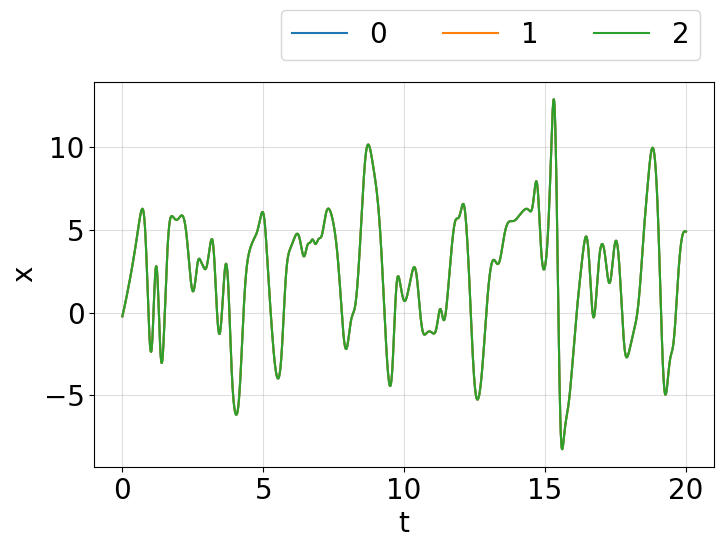

In [6]:
Plotter.mplot(
    times,
    [states[0, :] for i in methods],
    labels=[str(i) for i in methods],
    xlabel="t",
    ylabel="x",
)